**Purpose:** Extract and plot the TIaaS stats

In [1]:
import datetime
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = (pd.read_csv('../data/tiaas_stats.csv', sep=',')
      # transform Y / N to True / False
     .replace("Y", True)
     .replace("N", False))
# transform date to datetime
df['start'] = df['start'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
df.head()
# GTN
gtn_df = df[df.use_gtn]
# training
# training_df = df[df.workshop]
# teaching
teaching_df = df[~df.workshop]

In [3]:
def aggregate_per_month(df, months, names):
    '''
    :param df: dataframe to aggregate
    :param months: series with months
    :param names: list with names of columns
    
    :return: dataframe with 2 columns (events, participants)
    '''
    df_group_per_months = df.groupby(months)
    event_per_months = df_group_per_months.count().start
    participant_per_month = df_group_per_months.sum().attendance
    df_per_month = (pd.concat([event_per_months, participant_per_month], axis = 1)
                    .rename(columns = {'start': names[0],
                             'attendance': names[1]}))
    return df_per_month

In [4]:
months = df.start.dt.to_period("M")
# all events
all_events_per_m = aggregate_per_month(df, months, ['TIaaS events', 'Participants to TIaaS events'])
# GTN events
gtn_events_per_m = aggregate_per_month(gtn_df, months, ['TIaaS events using GTN', 'Participants to TIaaS events using GTN'])
# training events
# training_events_per_m = aggregate_per_month(training_df, months, ['Training events', 'Participants to training events'])
# teaching events
teaching_events_per_m = aggregate_per_month(teaching_df, months, ['Teaching TIaaS events', 'Participants to teaching TIaaS events'])

In [5]:
event_nb_per_month = (pd
                      .concat([
                          all_events_per_m.iloc[:,0],
                          gtn_events_per_m.iloc[:,0],
                          teaching_events_per_m.iloc[:,0]], axis = 1)
                      .fillna(0))
participants_per_month = (pd
                      .concat([
                          all_events_per_m.iloc[:,1],
                          gtn_events_per_m.iloc[:,1],
                          teaching_events_per_m.iloc[:,1]], axis = 1)
                      .fillna(0))

<Figure size 432x288 with 0 Axes>

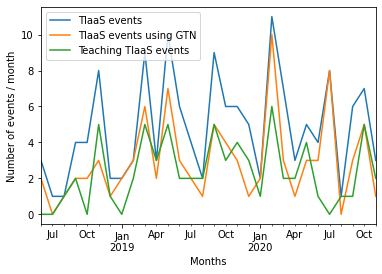

In [6]:
plt.figure()
event_nb_per_month.plot()
plt.xlabel('Months')
plt.ylabel('Number of events / month')
plt.show()

<Figure size 432x288 with 0 Axes>

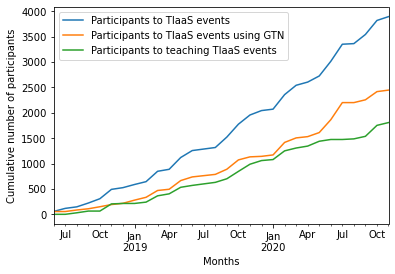

In [7]:
plt.figure()
(participants_per_month
    .cumsum()
    .plot())
plt.xlabel('Months')
plt.ylabel('Cumulative number of participants')
plt.show()